In [3]:
#importing packages 
import pandas 
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt  
import matplotlib
%matplotlib inline
import statsmodels.api as statsmodels #useful stats package with linear regression functions
import seaborn as sns #very nice plotting package
sns.set(color_codes=True) 

#import data
filename = 'house_data.csv'
data = pandas.read_csv(filename)
data=data.dropna() # delete empty cells
data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9.385200e+09,20150512T000000,729500.0,3.0,2.50,1660.0,1091.0,3.0,0.0,1.0,...,9.0,1530.0,130.0,2015.0,0.0,98116.0,47.5818,-122.402,1510.0,1352.0
1,1.832100e+09,20140625T000000,597326.0,4.0,4.00,3570.0,8250.0,2.0,0.0,0.0,...,10.0,2860.0,710.0,2015.0,0.0,98040.0,47.5784,-122.226,2230.0,10000.0
2,3.076501e+09,20141029T000000,385195.0,1.0,1.00,710.0,6000.0,1.5,0.0,0.0,...,6.0,710.0,0.0,2015.0,0.0,98144.0,47.5756,-122.316,1440.0,4800.0
3,8.077100e+09,20150422T000000,631000.0,3.0,2.25,1670.0,1396.0,2.0,0.0,0.0,...,9.0,1250.0,420.0,2015.0,0.0,98115.0,47.6814,-122.288,1610.0,5191.0
4,9.520900e+09,20141231T000000,614285.0,5.0,2.75,2730.0,6401.0,2.0,0.0,0.0,...,8.0,2730.0,0.0,2015.0,0.0,98072.0,47.7685,-122.160,2520.0,6126.0
5,1.250200e+09,20140624T000000,455000.0,2.0,1.50,1200.0,1259.0,2.0,0.0,0.0,...,8.0,1000.0,200.0,2015.0,0.0,98144.0,47.6001,-122.298,1320.0,1852.0
6,5.581001e+08,20150312T000000,628000.0,5.0,2.75,2600.0,8160.0,2.0,0.0,0.0,...,8.0,2600.0,0.0,2015.0,0.0,98133.0,47.7348,-122.340,1600.0,8160.0
7,8.156600e+09,20150326T000000,1290000.0,5.0,3.50,2980.0,5100.0,2.0,0.0,0.0,...,10.0,2370.0,610.0,2015.0,0.0,98115.0,47.6782,-122.299,1780.0,5100.0
8,2.770602e+09,20140826T000000,500000.0,2.0,2.25,1570.0,1269.0,2.0,0.0,0.0,...,9.0,1280.0,290.0,2015.0,0.0,98199.0,47.6514,-122.385,1570.0,6000.0
9,2.770602e+09,20150421T000000,671000.0,4.0,2.75,1890.0,1475.0,2.0,0.0,0.0,...,9.0,1200.0,690.0,2015.0,0.0,98199.0,47.6472,-122.383,1650.0,1682.0


In [86]:
data.describe() # descriptive stats

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.970000e+02,5.970000e+02,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.0,597.000000,597.000000,597.000000,597.000000,597.0,597.000000,597.000000,597.000000,597.000000,597.000000
mean,4.531750e+09,6.886416e+05,3.720268,2.747487,2614.175879,5923.112228,2.132328,0.003350,0.110553,3.0,8.582915,2433.979899,180.195980,2014.063652,0.0,98078.254606,47.554111,-122.210722,2265.752094,6192.063652
std,3.013101e+09,3.776990e+05,0.839747,0.598686,911.529269,9867.967086,0.392988,0.057831,0.541412,0.0,0.838609,885.363494,327.058586,0.244336,0.0,46.886327,0.134876,0.144672,813.435579,8051.941363
min,7.600065e+06,1.750030e+05,1.000000,1.000000,710.000000,638.000000,1.000000,0.000000,0.000000,3.0,6.000000,710.000000,0.000000,2014.000000,0.0,98001.000000,47.194800,-122.415000,910.000000,886.000000
25%,1.926059e+09,4.325000e+05,3.000000,2.500000,1800.000000,2250.000000,2.000000,0.000000,0.000000,3.0,8.000000,1658.000000,0.000000,2014.000000,0.0,98038.000000,47.487000,-122.340000,1580.000000,3500.000000
50%,3.797002e+09,5.999500e+05,4.000000,2.500000,2640.000000,4911.000000,2.000000,0.000000,0.000000,3.0,9.000000,2475.000000,0.000000,2014.000000,0.0,98075.000000,47.571100,-122.221000,2052.000000,5000.000000
75%,7.299600e+09,8.399900e+05,4.000000,3.250000,3266.000000,6565.000000,2.000000,0.000000,0.000000,3.0,9.000000,3080.000000,290.000000,2014.000000,0.0,98116.000000,47.669000,-122.113000,2815.000000,6899.000000
max,9.834201e+09,3.420000e+06,6.000000,5.000000,5790.000000,144619.000000,3.000000,1.000000,4.000000,3.0,11.000000,5450.000000,1490.000000,2015.000000,0.0,98199.000000,47.776000,-121.734000,5790.000000,131007.000000


In [87]:
data['price'].describe() # descriptive stats for price

count    5.970000e+02
mean     6.886416e+05
std      3.776990e+05
min      1.750030e+05
25%      4.325000e+05
50%      5.999500e+05
75%      8.399900e+05
max      3.420000e+06
Name: price, dtype: float64

In [103]:
print(" the median of the houses prices is ", data.loc[:,"price"].median()) # print median 

 the median of the houses prices is  599950.0


In [104]:
print(" the median of the houses prices is ", data.loc[:,"price"].mode()) #print mode

 the median of the houses prices is  0     550000.0
1     635000.0
2    1050000.0
dtype: float64


In [89]:
data['sqft_living'].describe() #descriptive stats for house areas

count     597.000000
mean     2614.175879
std       911.529269
min       710.000000
25%      1800.000000
50%      2640.000000
75%      3266.000000
max      5790.000000
Name: sqft_living, dtype: float64

In [101]:
print(" the median of the houses area is", data.loc[:,"sqft_living"].median()) #print median



 the median of the houses area is 2640.0
 the mode of the houses area is 0    1690.0
dtype: float64


In [102]:
print(" the mode of the houses area is", data.loc[:,"sqft_living"].mode()) #print mode

 the mode of the houses area is 0    1690.0
dtype: float64


<Figure size 1224x720 with 0 Axes>

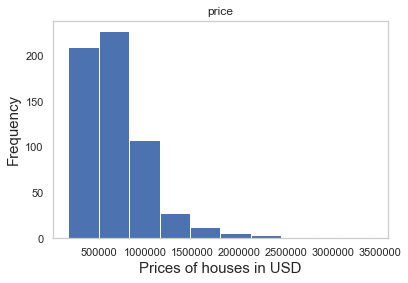

In [106]:
import matplotlib.pyplot as plt # importing the library
fig=plt.figure(figsize=(17,10)) #adjusting the size of the histogram
data.hist(column='price') # identifying which column for the data
plt.xlabel('Prices of houses in USD', fontsize=15) #labelling the x-axis
plt.ylabel('Frequency', fontsize=15) #labelling the y-axis
plt.grid(False) #hide gridlines

<Figure size 1224x720 with 0 Axes>

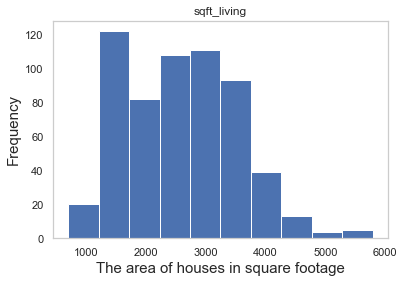

In [105]:
import matplotlib.pyplot as plt # importing the library
fig=plt.figure(figsize=(17,10)) #adjusting the size of the histogram
data.hist(column='sqft_living') # identifying which column for the data
plt.xlabel('The area of houses in square footage', fontsize=15) #labelling the x-axis
plt.ylabel('Frequency', fontsize=15) #labelling the y-axis
plt.grid(False) #hide gridlines

In [5]:
def regression_model(column_x, column_y): # define a function


    #fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() # "ordinary least squares"

    #extract regression parameters from model, rounded to 3 decimal places:
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)

    #make plots:
    sns.set_style("whitegrid")
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", ax=ax1) #scatter plot
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) #residual plot
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    plt.figure(figsize=(5.5,4)) #histogram
    sns.distplot(regressionmodel.resid, kde=True, axlabel='Residuals', color='red') #histogram

    #print R-squared and the regression equation
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


R-squared =  0.451
Regression equation: price =  278.397 * sqft_living +  -39137.129


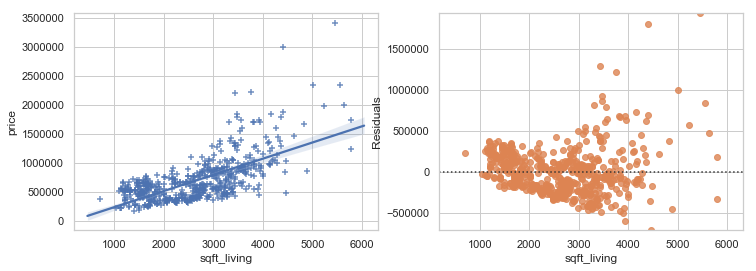

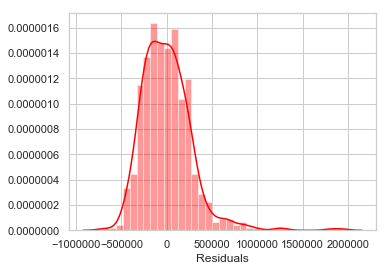

In [107]:
regression_model('sqft_living','price')

In [79]:
R =  0.451 # R-squared value
n= 597 #sample size
Sy = 3.776990e+05 #standard deviation of house price
Sx = 911.529269  #standard deviation of house area without basement 
SE = ((1-R)/(n-2))**0.5 *(Sy/Sx) #formula to calculate standard error of slope

print(SE) # print standard error of slope

12.586439889264593


In [80]:
slope = 278.397 #slope from the equation
T = (slope - 0)/SE #calculating 
print(T)

22.118804240860385


In [83]:

pvalue= stats.t.sf(22.11,595) #calculating the p-value using the T-score and degree of fredoom
print(pvalue)

7.95609109433037e-80


In [82]:

t = stats.t.ppf (1 - 0.025, df) #calculating t
def confidence_interval(slope, t, SE): #defining a function that calculate confidence interval 
    lowbound= slope - t*SE
    highbound= slope + t*SE
    
    return lowbound, highbound
print(confidence_interval(slope, t, SE)) 

(253.67766353548518, 303.1163364645148)
